ANNs are at the very core of Deep Learning. They are versatile, powerful, and scalable, making them ideal to tackle large and highly complex Machine Learning tasks, such as classifying billions of images (e.g., Google Images), powering speech recognition
services (e.g., Apple’s Siri), recommending the best videos to watch to hundreds of millions of users every day (e.g., YouTube), or learning to beat the world champion at the game of Go by examining millions of past games and then playing against itself (DeepMind’s AlphaGo).

In [9]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

## Case Study: Perceptro / Numpy and sklearn

In [6]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [7]:
y_pred

array([1])

Plot the resutls:

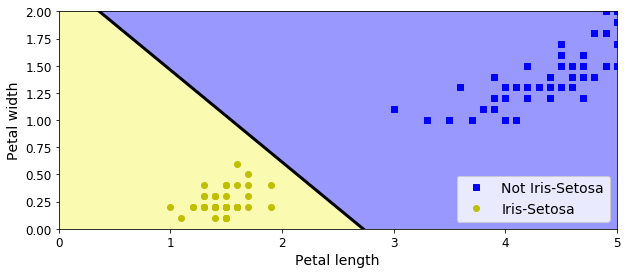

In [12]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

You may have recognized that the Perceptron learning algorithm strongly resembles `Stochastic Gradient Descent`.

# Activation functions

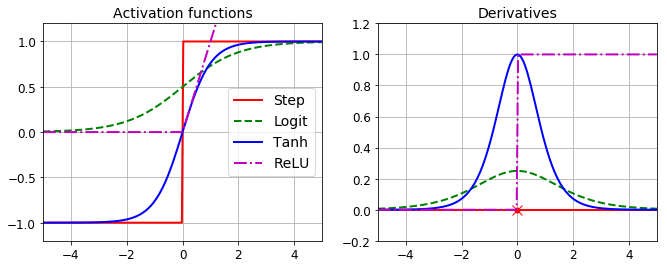

In [13]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

## an MLP can solve the XOR problem

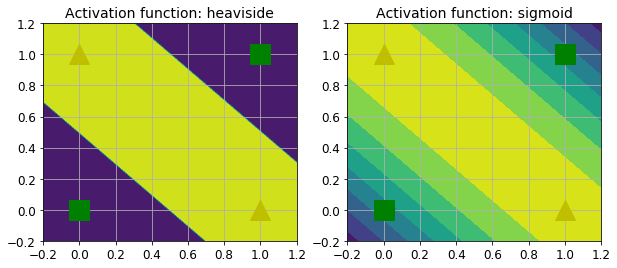

In [14]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Training an MLP with TensorFlow’s High-Level API

The simplest way to train an MLP with TensorFlow is to use the high-level API `TF.Learn`, which is quite similar to Scikit-Learn’s API. The DNNClassifier class makes it trivial to train a deep neural network with any number of hidden layers, and a softmax output layer to output estimated class probabilities. 

For example, the following code trains a DNN for classification with two hidden layers (one with 300 neurons, and the other with 100 neurons) and a softmax output layer with 10 neurons:

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


In [33]:
# Load the data
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

print(X_train[:,0])
print(y_train[0])

[0. 0. 0. ... 0. 0. 0.]
7


In [18]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=2018)  
feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)

dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)

dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)


INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001BD61753F98>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 2018, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\CAIHAO~1\\AppData\\Local\\Temp\\tmpiuub532p'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\CAIHAO~1\AppData\Local\Temp\tmpiuub532p\model.ckpt.
INFO:tensorflow:loss = 2.3865402, step = 1
INFO:tensorflow:global_step/sec: 427.736
INFO:tensorflow:loss = 0.35371193, step = 101 (0.225 sec)
INFO:tensorflow:global_ste

INFO:tensorflow:global_step/sec: 462.632
INFO:tensorflow:loss = 0.008467368, step = 7301 (0.216 sec)
INFO:tensorflow:global_step/sec: 453.273
INFO:tensorflow:loss = 0.015107944, step = 7401 (0.220 sec)
INFO:tensorflow:global_step/sec: 318.244
INFO:tensorflow:loss = 0.0036746261, step = 7501 (0.319 sec)
INFO:tensorflow:global_step/sec: 414.647
INFO:tensorflow:loss = 0.019570954, step = 7601 (0.238 sec)
INFO:tensorflow:global_step/sec: 492.262
INFO:tensorflow:loss = 0.0071812756, step = 7701 (0.202 sec)
INFO:tensorflow:global_step/sec: 502.153
INFO:tensorflow:loss = 0.004411547, step = 7801 (0.199 sec)
INFO:tensorflow:global_step/sec: 494.701
INFO:tensorflow:loss = 0.037402906, step = 7901 (0.202 sec)
INFO:tensorflow:global_step/sec: 494.699
INFO:tensorflow:loss = 0.002211162, step = 8001 (0.202 sec)
INFO:tensorflow:global_step/sec: 488.421
INFO:tensorflow:loss = 0.018937256, step = 8101 (0.205 sec)
INFO:tensorflow:global_step/sec: 382.866
INFO:tensorflow:loss = 0.02699827, step = 8201 (

INFO:tensorflow:loss = 0.0012119865, step = 15301 (0.198 sec)
INFO:tensorflow:global_step/sec: 509.635
INFO:tensorflow:loss = 0.002043886, step = 15401 (0.196 sec)
INFO:tensorflow:global_step/sec: 598.903
INFO:tensorflow:loss = 0.0050556343, step = 15501 (0.180 sec)
INFO:tensorflow:global_step/sec: 423.918
INFO:tensorflow:loss = 0.005370993, step = 15601 (0.224 sec)
INFO:tensorflow:global_step/sec: 331.989
INFO:tensorflow:loss = 0.009626559, step = 15701 (0.301 sec)
INFO:tensorflow:global_step/sec: 393.425
INFO:tensorflow:loss = 0.0013605887, step = 15801 (0.253 sec)
INFO:tensorflow:global_step/sec: 525.943
INFO:tensorflow:loss = 0.0003116989, step = 15901 (0.189 sec)
INFO:tensorflow:global_step/sec: 555.141
INFO:tensorflow:loss = 0.0051839636, step = 16001 (0.179 sec)
INFO:tensorflow:global_step/sec: 578.043
INFO:tensorflow:loss = 0.0032211784, step = 16101 (0.172 sec)
INFO:tensorflow:global_step/sec: 581.811
INFO:tensorflow:loss = 0.00035252835, step = 16201 (0.188 sec)
INFO:tensorfl

INFO:tensorflow:loss = 0.0026132206, step = 23301 (0.177 sec)
INFO:tensorflow:global_step/sec: 557.729
INFO:tensorflow:loss = 0.0005385091, step = 23401 (0.179 sec)
INFO:tensorflow:global_step/sec: 525.696
INFO:tensorflow:loss = 0.0011864526, step = 23501 (0.190 sec)
INFO:tensorflow:global_step/sec: 581.811
INFO:tensorflow:loss = 0.00045511936, step = 23601 (0.172 sec)
INFO:tensorflow:global_step/sec: 526.532
INFO:tensorflow:loss = 0.00043325083, step = 23701 (0.192 sec)
INFO:tensorflow:global_step/sec: 595.774
INFO:tensorflow:loss = 0.0012826435, step = 23801 (0.166 sec)
INFO:tensorflow:global_step/sec: 526.262
INFO:tensorflow:loss = 0.0014155287, step = 23901 (0.190 sec)
INFO:tensorflow:global_step/sec: 541.64
INFO:tensorflow:loss = 0.00086967176, step = 24001 (0.189 sec)
INFO:tensorflow:global_step/sec: 554.026
INFO:tensorflow:loss = 0.00058094045, step = 24101 (0.176 sec)
INFO:tensorflow:global_step/sec: 581.813
INFO:tensorflow:loss = 0.0019684997, step = 24201 (0.172 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 401.532
INFO:tensorflow:loss = 0.00038856704, step = 31301 (0.253 sec)
INFO:tensorflow:global_step/sec: 502.48
INFO:tensorflow:loss = 0.00091723964, step = 31401 (0.195 sec)
INFO:tensorflow:global_step/sec: 446.31
INFO:tensorflow:loss = 0.0004236048, step = 31501 (0.223 sec)
INFO:tensorflow:global_step/sec: 425.229
INFO:tensorflow:loss = 0.00018309422, step = 31601 (0.235 sec)
INFO:tensorflow:global_step/sec: 448.113
INFO:tensorflow:loss = 0.00069887115, step = 31701 (0.223 sec)
INFO:tensorflow:global_step/sec: 491.985
INFO:tensorflow:loss = 0.00018724034, step = 31801 (0.200 sec)
INFO:tensorflow:global_step/sec: 455.682
INFO:tensorflow:loss = 0.0009498808, step = 31901 (0.224 sec)
INFO:tensorflow:global_step/sec: 338.746
INFO:tensorflow:loss = 0.00049013976, step = 32001 (0.296 sec)
INFO:tensorflow:global_step/sec: 428.88
INFO:tensorflow:loss = 0.00036675102, step = 32101 (0.230 sec)
INFO:tensorflow:global_step/sec: 502.157
INFO:tensorflow:loss = 0.001

INFO:tensorflow:loss = 0.0005535483, step = 39201 (0.188 sec)
INFO:tensorflow:global_step/sec: 544.112
INFO:tensorflow:loss = 0.00027671046, step = 39301 (0.168 sec)
INFO:tensorflow:global_step/sec: 536.037
INFO:tensorflow:loss = 0.00091978715, step = 39401 (0.202 sec)
INFO:tensorflow:global_step/sec: 533.325
INFO:tensorflow:loss = 0.00025404184, step = 39501 (0.172 sec)
INFO:tensorflow:global_step/sec: 581.814
INFO:tensorflow:loss = 0.0006290889, step = 39601 (0.188 sec)
INFO:tensorflow:global_step/sec: 533.327
INFO:tensorflow:loss = 0.00024054694, step = 39701 (0.172 sec)
INFO:tensorflow:global_step/sec: 558.861
INFO:tensorflow:loss = 0.0011457022, step = 39801 (0.179 sec)
INFO:tensorflow:global_step/sec: 533.327
INFO:tensorflow:loss = 0.0010225807, step = 39901 (0.188 sec)
INFO:tensorflow:Saving checkpoints for 40000 into C:\Users\CAIHAO~1\AppData\Local\Temp\tmpiuub532p\model.ckpt.
INFO:tensorflow:Loss for final step: 0.00043639736.


SKCompat()

The TF.Learn library also provides some convenience functions to evaluate models:

In [21]:
# dnn_clf.evaluate(X_test, y_test)

AttributeError: 'SKCompat' object has no attribute 'evaluate'

In [19]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from C:\Users\CAIHAO~1\AppData\Local\Temp\tmpiuub532p\model.ckpt-40000


0.9818

In [20]:
from sklearn.metrics import log_loss

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.07522361482517576

# Training a DNN Using Plain TensorFlow

If you want more control over the architecture of the network, you may prefer to use TensorFlow’s lower-level Python API:

## Construction Phase
Let’s start. First we need to import the tensorflow library. Then we must specify the number of inputs and outputs, and set the number of hidden neurons in each layer:

In [35]:
import tensorflow as tf

n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

The shape of X is only partially defined. We know that it will be a 2D tensor (i.e., a matrix), with instances along the first dimension and features along the second dimension, and we know that the number of features is going to be 28 x 28 (one feature per pixel), but we don’t know yet how many instances each training batch will contain. So the shape of X is (None, n_inputs). 
Similarly, we know that y will be a 1D tensor with one entry per instance, but again we don’t know the size of the training batch at this point, so the shape is (None).

In [36]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

Now let’s create the actual neural network. The placeholder X will act as the input layer; during the execution phase, it will be replaced with one training batch at a time
(note that all the instances in a training batch will be processed simultaneously by the neural network). Now you need to create the two hidden layers and the output layer.
The two hidden layers are almost identical: they differ only by the inputs they are connected to and by the number of neurons they contain. The output layer is also
very similar, but it uses a softmax activation function instead of a ReLU activation function.

In [37]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2/np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="weights")
        b = tf.Variable(tf.zeros([n_neurons]), name = "biases")
        z = tf.matmul(X, W)+b
        if activation == "relu":
            return tf.nn.relu(z)
        else:
            return z

### Let’s go through this code line by line:
1. First we create a name scope using the name of the layer: it will contain all the computation nodes for this neuron layer. This is optional, but the graph will look much nicer in TensorBoard if its nodes are well organized.
2. Next, we get the number of inputs by looking up the input matrix’s shape and getting the size of the second dimension (the first dimension is for instances).
3. The next three lines create a W variable that will hold the weights matrix. It will be a 2D tensor containing all the connection weights between each input and each neuron; hence, its shape will be (n_inputs, n_neurons). It will be initialized randomly, using a truncated normal (Gaussian) distribution with a standard deviation of $ 2 / \sqrt{n_{inputs}} $. **(Using this specific standard deviation helps the algorithm converge much faster)** It is important to initialize connection weights  randomly for all hidden layers to avoid any symmetries that the Gradient Descent algorithm would be unable to break.
4. The next line creates a b variable for biases, initialized to 0 (no symmetry issue in this case), with one bias parameter per neuron.
5. Then we create a subgraph to compute $z = X\cdot W + b$. This vectorized implementation will efficiently compute the weighted sums of the inputs plus the bias term for each and every neuron in the layer, for all the instances in the batch in just one shot. 
6. Finally, if the activation parameter is set to "relu", the code returns relu(z) (i.e., $max (0, z)$), or else it just returns z.


The first hidden layer takes X as its input. The second takes the output of the first hidden layer as its input. And finally, the output layer takes the output of the second hidden layer as its input.

In [38]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, "hidden1", activation = "relu")
    hidden2 = neuron_layer(hidden1, n_hidden2, "hidden2", activation = "relu")
    logits = neuron_layer(hidden2, n_outputs, "outputs")
    

Notice that once again we used a name scope for clarity. Also note that logits is the output of the neural network before going through the softmax activation function: for optimization reasons, we will handle the softmax computation later.

As you might expect, TensorFlow comes with many handy functions to create standard neural network layers, so there’s often no need to define your own neuron_layer() function like we just did. For example, TensorFlow’s fully_connected() function creates a fully connected layer, where all the inputs are connected to all the neurons in the layer. It takes care of creating the weights and biases variables, with the proper initialization strategy, and it uses the ReLU activation function by default (we can change this using the activation_fn argument).
```python
from tensorflow.contrib.layers import fully_connected
with tf.name_scope("dnn"):
    hidden1 = fully_connected(X, n_hidden1, scope="hidden1")
    hidden2 = fully_connected(hidden1, n_hidden2, scope="hidden2")
    logits = fully_connected(hidden2, n_outputs, scope="outputs", activation_fn=None)
```

The tensorflow.contrib package contains many useful functions, but it is a place for experimental code that has not yet graduated to be part of the main TensorFlow API. So the fully_connected() function (and any other contrib code) may change or move in the future.

### Using dense() instead of neuron_layer()

It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.

```python
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
```    





Now that we have the neural network model ready to go, we need to define the cost function that we will use to train it. Just as we did for Softmax Regression. we will use cross entropy. As we discussed earlier, cross entropy will penalize models that estimate a low probability for the target class. TensorFlow provides several functions to compute cross entropy.

We will use `sparse_soft` `max_cross_entropy_with_logits()`: it computes the cross entropy based on the “logits”. 
It expects labels in the form of integers ranging from 0 to the number of classes minus 1 (in our case, from 0 to 9). This will give us a 1D tensor containing the cross entropy for each instance. We can then use TensorFlow’s reduce_mean() function to compute the mean cross entropy over all instances.

In [39]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

The `sparse_softmax_cross_entropy_with_logits()` function isequivalent to applying the softmax activation function and then
computing the cross entropy, but it is more efficient, and it properly takes care of corner cases like logits equal to 0. 
This is why we did not apply the softmax activation function earlier. There is also another function called `softmax_cross_entropy_with_logits()`, which takes labels in the form of one-hot vectors (instead of ints from 0 to the number of classes minus 1).

We have the neural network model, we have the cost function, and now we need to define a `GradientDescentOptimizer` that will tweak the model parameters to minimize the cost function.

In [40]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

The last important step in the construction phase is to specify how to evaluate the model. We will simply use accuracy as our performance measure. First, for each instance, determine if the neural network’s prediction is correct by checking whether or not the highest logit corresponds to the target class.

For this you can use the `in_top_k()` function. This returns a 1D tensor full of boolean values, so we need to cast these booleans to floats and then compute the average. This will give us the network’s overall accuracy.

In [42]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

And, as usual, we need to create a node to initialize all variables, and we will also create a Saver to save our trained model parameters to disk:

In [43]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Phew! This concludes the construction phase. This was fewer than 40 lines of code, but it was pretty intense: we created placeholders for the inputs and the targets, we created a function to build a neuron layer, we used it to create the DNN, we defined the cost function, we created an optimizer, and finally we defined the performance measure. Now on to the execution phase.


## Execution Phase
This part is much shorter and simpler. First, let’s load MNIST. We could use Scikit-Learn for that as we did in previous chapters, but TensorFlow offers its own helper that fetches the data, scales it (between 0 and 1), shuffles it, and provides a simple function to load one mini-batches a time. So let’s use it instead:

In [44]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./tmp/data/")

Extracting ./tmp/data/train-images-idx3-ubyte.gz
Extracting ./tmp/data/train-labels-idx1-ubyte.gz
Extracting ./tmp/data/t10k-images-idx3-ubyte.gz
Extracting ./tmp/data/t10k-labels-idx1-ubyte.gz


Now we define the number of epochs that we want to run, as well as the size of the mini-batches:

In [45]:
n_epochs = 400
batch_size = 50

And now we can train the model:

In [47]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict = {X:X_batch, y:y_batch})
        acc_train = accuracy.eval(feed_dict = {X: X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict = {X: mnist.test.images, y:mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    save_path = saver.save(sess, "./my_model_final.ckpt")    

0 Train accuracy: 0.9 Test accuracy: 0.9132
1 Train accuracy: 1.0 Test accuracy: 0.9297
2 Train accuracy: 0.98 Test accuracy: 0.9412
3 Train accuracy: 0.96 Test accuracy: 0.9457
4 Train accuracy: 0.96 Test accuracy: 0.9508
5 Train accuracy: 0.94 Test accuracy: 0.9556
6 Train accuracy: 1.0 Test accuracy: 0.9558
7 Train accuracy: 0.96 Test accuracy: 0.9596
8 Train accuracy: 0.94 Test accuracy: 0.9622
9 Train accuracy: 0.98 Test accuracy: 0.9635
10 Train accuracy: 0.98 Test accuracy: 0.9663
11 Train accuracy: 1.0 Test accuracy: 0.966
12 Train accuracy: 1.0 Test accuracy: 0.9678
13 Train accuracy: 1.0 Test accuracy: 0.9694
14 Train accuracy: 0.92 Test accuracy: 0.9694
15 Train accuracy: 1.0 Test accuracy: 0.9706
16 Train accuracy: 1.0 Test accuracy: 0.9717
17 Train accuracy: 1.0 Test accuracy: 0.9714
18 Train accuracy: 1.0 Test accuracy: 0.9727
19 Train accuracy: 0.98 Test accuracy: 0.9734
20 Train accuracy: 0.98 Test accuracy: 0.9738
21 Train accuracy: 0.98 Test accuracy: 0.9736
22 Train 

181 Train accuracy: 1.0 Test accuracy: 0.9807
182 Train accuracy: 1.0 Test accuracy: 0.981
183 Train accuracy: 1.0 Test accuracy: 0.9813
184 Train accuracy: 1.0 Test accuracy: 0.981
185 Train accuracy: 1.0 Test accuracy: 0.9815
186 Train accuracy: 1.0 Test accuracy: 0.9813
187 Train accuracy: 1.0 Test accuracy: 0.9811
188 Train accuracy: 1.0 Test accuracy: 0.9812
189 Train accuracy: 1.0 Test accuracy: 0.9815
190 Train accuracy: 1.0 Test accuracy: 0.9815
191 Train accuracy: 1.0 Test accuracy: 0.981
192 Train accuracy: 1.0 Test accuracy: 0.9813
193 Train accuracy: 1.0 Test accuracy: 0.9812
194 Train accuracy: 1.0 Test accuracy: 0.9818
195 Train accuracy: 1.0 Test accuracy: 0.9813
196 Train accuracy: 1.0 Test accuracy: 0.981
197 Train accuracy: 1.0 Test accuracy: 0.9817
198 Train accuracy: 1.0 Test accuracy: 0.9812
199 Train accuracy: 1.0 Test accuracy: 0.9813
200 Train accuracy: 1.0 Test accuracy: 0.9815
201 Train accuracy: 1.0 Test accuracy: 0.9816
202 Train accuracy: 1.0 Test accuracy:

360 Train accuracy: 1.0 Test accuracy: 0.9817
361 Train accuracy: 1.0 Test accuracy: 0.9817
362 Train accuracy: 1.0 Test accuracy: 0.9815
363 Train accuracy: 1.0 Test accuracy: 0.9816
364 Train accuracy: 1.0 Test accuracy: 0.9818
365 Train accuracy: 1.0 Test accuracy: 0.9816
366 Train accuracy: 1.0 Test accuracy: 0.9817
367 Train accuracy: 1.0 Test accuracy: 0.9816
368 Train accuracy: 1.0 Test accuracy: 0.9816
369 Train accuracy: 1.0 Test accuracy: 0.9816
370 Train accuracy: 1.0 Test accuracy: 0.9815
371 Train accuracy: 1.0 Test accuracy: 0.9817
372 Train accuracy: 1.0 Test accuracy: 0.9815
373 Train accuracy: 1.0 Test accuracy: 0.9817
374 Train accuracy: 1.0 Test accuracy: 0.9816
375 Train accuracy: 1.0 Test accuracy: 0.9817
376 Train accuracy: 1.0 Test accuracy: 0.9817
377 Train accuracy: 1.0 Test accuracy: 0.9816
378 Train accuracy: 1.0 Test accuracy: 0.9816
379 Train accuracy: 1.0 Test accuracy: 0.9816
380 Train accuracy: 1.0 Test accuracy: 0.9816
381 Train accuracy: 1.0 Test accur

## Using the Neural Network
Now that the neural network is trained, you can use it to make predictions. To do that, you can reuse the same construction phase, but change the execution phase like
this: 

In [48]:
with tf.Session() as sess:
    # saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    saver.restore(sess, save_path)
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])    

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt
Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [49]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [50]:
show_graph(tf.get_default_graph())

#  Using dense() instead of neuron_layer()

In [51]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()

n_epochs = 40
n_batches = 500

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")
    

0 Train accuracy: 0.96 Test accuracy: 0.905
1 Train accuracy: 0.98 Test accuracy: 0.9208
2 Train accuracy: 0.96 Test accuracy: 0.93
3 Train accuracy: 0.92 Test accuracy: 0.9373
4 Train accuracy: 0.98 Test accuracy: 0.942
5 Train accuracy: 0.96 Test accuracy: 0.9472
6 Train accuracy: 0.92 Test accuracy: 0.9521
7 Train accuracy: 0.96 Test accuracy: 0.955
8 Train accuracy: 0.98 Test accuracy: 0.9576
9 Train accuracy: 1.0 Test accuracy: 0.9596
10 Train accuracy: 1.0 Test accuracy: 0.9622
11 Train accuracy: 0.98 Test accuracy: 0.963
12 Train accuracy: 0.98 Test accuracy: 0.9649
13 Train accuracy: 0.98 Test accuracy: 0.966
14 Train accuracy: 1.0 Test accuracy: 0.9679
15 Train accuracy: 0.98 Test accuracy: 0.9688
16 Train accuracy: 0.96 Test accuracy: 0.9694
17 Train accuracy: 1.0 Test accuracy: 0.9691
18 Train accuracy: 0.96 Test accuracy: 0.9713
19 Train accuracy: 1.0 Test accuracy: 0.9718
20 Train accuracy: 0.96 Test accuracy: 0.9717
21 Train accuracy: 1.0 Test accuracy: 0.973
22 Train acc

In [52]:
show_graph(tf.get_default_graph())

# Build a Deep MLP on the MNIST data  

tensorflow, tensorboard and early stop.

In [54]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [55]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y") 

In [56]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [57]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [58]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [59]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [60]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [61]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [67]:
logdir = log_dir("mnist_dnn")
print(logdir)

tf_logs/mnist_dnn-run-20180427024536/


Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [63]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need a validation set. Luckily, the dataset returned by TensorFlow's `input_data()` function (see above) is already split into a training set (60,000 instances, already shuffled for us), a validation set (5,000 instances) and a test set (5,000 instances). So we can easily define `X_valid` and `y_valid`:

In [64]:
X_valid = mnist.validation.images
y_valid = mnist.validation.labels

In [65]:
m, n = X_train.shape

In [66]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "./tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 90.380% 	Loss: 0.35409
Epoch: 5 	Validation accuracy: 95.160% 	Loss: 0.17636
Epoch: 10 	Validation accuracy: 96.720% 	Loss: 0.12707
Epoch: 15 	Validation accuracy: 97.100% 	Loss: 0.10307
Epoch: 20 	Validation accuracy: 97.460% 	Loss: 0.09035
Epoch: 25 	Validation accuracy: 97.780% 	Loss: 0.08158
Epoch: 30 	Validation accuracy: 97.780% 	Loss: 0.07567
Epoch: 35 	Validation accuracy: 97.780% 	Loss: 0.07470
Epoch: 40 	Validation accuracy: 98.000% 	Loss: 0.07016
Epoch: 45 	Validation accuracy: 98.020% 	Loss: 0.06785
Epoch: 50 	Validation accuracy: 97.980% 	Loss: 0.06783
Epoch: 55 	Validation accuracy: 98.080% 	Loss: 0.06654
Epoch: 60 	Validation accuracy: 98.140% 	Loss: 0.06585
Epoch: 65 	Validation accuracy: 98.080% 	Loss: 0.06609
Epoch: 70 	Validation accuracy: 98.180% 	Loss: 0.06679
Epoch: 75 	Validation accuracy: 98.180% 	Loss: 0.06604
Epoch: 80 	Validation accuracy: 98.140% 	Loss: 0.06620
Epoch: 85 	Validation accuracy: 98.160% 	Loss: 0.06727
Epoch: 90 	V

In [68]:
os.remove(checkpoint_epoch_path)

In [69]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [70]:
accuracy_val

0.979